<a href="https://colab.research.google.com/github/Bross-DataScience/Cluster_Metodo_Elbow/blob/main/Cluster_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importando Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/store.csv')   # Importando arquivo CSV do Google Drive

In [4]:
data.head() # Listando os 05 primeiros registros do Dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.columns # Listando as Colunas do Dataset

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
data.columns=['IdCliente', 'Genero', 'Idade', 'Renda_Anual', 'Nivel_Gasto_Anual(1-100)'] # Renomeando as Colunas no Dataset

In [7]:
data.head() # Listando as Colunas Renomeadas

,IdCliente,Genero,Idade,Renda_Anual,Nivel_Gasto_Anual(1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
data.set_index('IdCliente', inplace=True) # Alterando o Indice do Dataset, que passa a Ser a Coluna IdCliente

In [9]:
data.head() # Verificando o Novo Indice do Dataset

,Genero,Idade,Renda_Anual,Nivel_Gasto_Anual(1-100)
IdCliente,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


#### Desse DataSet iremos fazer uso de apenas duas colunas - Renda_Anual, Nivel_Gasto_Anual(1-100), sendo assim iremos criar um novo DataFrame com apenas essas duas colunas.

In [10]:
df = data[['Renda_Anual', 'Nivel_Gasto_Anual(1-100)']]  # Gerando um novo Dataset e Armazenado na variavel df

In [12]:
df.head() # Listando as 05 primeiras linhas do Dataset df

,Renda_Anual,Nivel_Gasto_Anual(1-100)
IdCliente,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40


#### Agora iremos Plotar um gráfico de Dispersão para vermos melhor esses dados

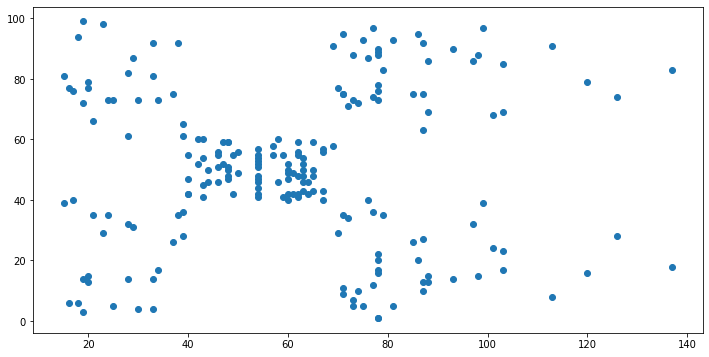

In [13]:
plt.figure(figsize=(12,6))  # Configurando o Tamanho do Gráfico
plt.scatter(df['Renda_Anual'], df['Nivel_Gasto_Anual(1-100)']) # Informando as Colunas que serão Plotadas
plt.xlabel('Clusters') # Título eixo X
plt.ylabel('Variations') # Título eixo Y
plt.show()

#### Agora que já temos uma boa visão de como estão espalhados os dados, temos que agrupar esses dados separando-os em Clusters e para isso vamos utilizar o método Elbow(Cotovelo)

In [14]:
from sklearn.cluster import KMeans # Importando Biblioteca

In [15]:
X = df.values # Armazenando os Valores de Df na Variável X

In [22]:
X.shape # Verificando o Shape de X

(200, 2)

#### Agora precisaremos utilizar o KMeans que irá nos informar a quantidade ideal de clusters, para posteriomente aplicarmos no modelo

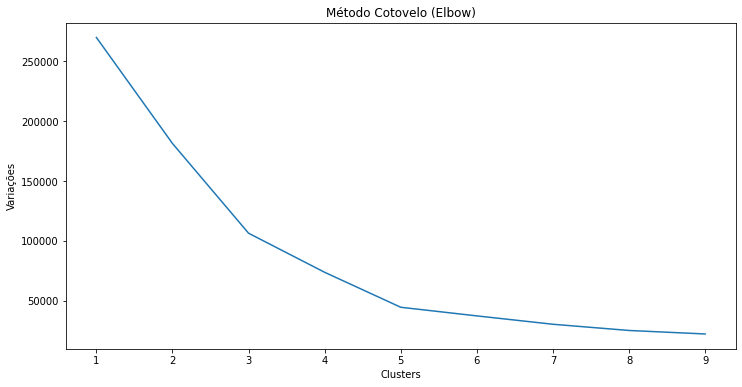

In [33]:
variations = []
for i in range(1, 10):
  kmeans = KMeans(n_clusters=i, init='k-means++')
  kmeans.fit(X)
  variations.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.plot(range(1, 10), variations)
plt.title('Método Cotovelo (Elbow)') 
plt.xlabel('Clusters')
plt.ylabel('Variações')
plt.show()

#### No gráfico acima podemos perceber que a taxa de variação começa a ficar mais regular a partir do 5 então vamos adotar 5 como o números de clusters ideal

In [25]:
kmeans_final = KMeans(n_clusters=5) # Setando a Quantidade de Clusters 

In [26]:
kmeans_final.fit(X) # Rodando Predição de Clusters de acordo com a quantidade ideal 5

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [27]:
cluster_pred = kmeans_final.predict(X) # Fazendo a Predição 

In [28]:
cluster_centro = kmeans_final.cluster_centers_ # Pegando os Centros de Cada Cluster

In [29]:
cluster_centro # Visualizando os Pontos dos Cluster de Centro

array([[55.2962963 , 49.51851852],
       [26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636]])

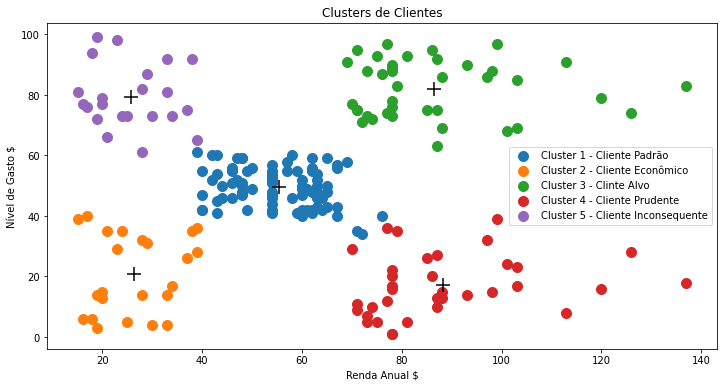

In [35]:
plt.figure(figsize=(12,6))
plt.scatter(X[cluster_pred==0, 0], X[cluster_pred==0, 1], s=100, label='Cluster 1 - Cliente Padrão')
plt.scatter(X[cluster_pred==1, 0], X[cluster_pred==1, 1], s=100, label='Cluster 2 - Cliente Econômico')
plt.scatter(X[cluster_pred==2, 0], X[cluster_pred==2, 1], s=100, label='Cluster 3 - Clinte Alvo')
plt.scatter(X[cluster_pred==3, 0], X[cluster_pred==3, 1], s=100, label='Cluster 4 - Cliente Prudente')
plt.scatter(X[cluster_pred==4, 0], X[cluster_pred==4, 1], s=100, label='Cluster 5 - Cliente Inconsequente')
plt.scatter(cluster_centro[:,0], cluster_centro[:,1], marker='+', s=180, c='black')
plt.title('Clusters de Clientes')
plt.xlabel('Renda Anual $')
plt.ylabel('Nível de Gasto $')
plt.legend()
plt.show()

#### Agora temos uma boa visão de como estão segregados nossos clientes e assim podemos personalizar nossos produtos/serviços de acordo com as características de cada cliente.
